In [1]:
!pip install numpy pandas scikit-learn tensorflow matplotlib seaborn


Step 1 — Import Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from google.colab import drive   # ✅ FIXED import

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Step 2 — Load Dataset

In [4]:
df = pd.read_csv("/content/drive/MyDrive/ANN/3/Assignment_1/diabetes.csv")  # ✅ Correct Colab path
print("Column names in dataset:")
print(df.columns)

Column names in dataset:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


Step 3 — Replace Missing or Zero Values

In [6]:
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

# for col in cols_with_zero:
#     df[col].replace(0, np.nan, inplace=True)
#     df[col].fillna(df[col].median(), inplace=True)

for col in cols_with_zero:
    # Replace zeros with NaN
    df.loc[:, col] = df[col].replace(0, np.nan)

    # Fill NaN with median
    df.loc[:, col] = df[col].fillna(df[col].median())


Step 4 — Split Features and Target

In [7]:
X = df.drop("Outcome", axis=1)
y = df["Outcome"]


Step 5 — Train–Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


Step 6 — Feature Scaling

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Step 7 — Build the ANN Model

In [10]:
model = Sequential()

# Input layer + Hidden layer 1
model.add(Dense(16, activation='relu', input_dim=X_train.shape[1]))

# Hidden layer 2
model.add(Dense(8, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Step 8 — Train the Model

In [11]:
history = model.fit(X_train, y_train, epochs=100, batch_size=16,
                    validation_split=0.1, verbose=1)


Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6030 - loss: 0.6923 - val_accuracy: 0.6452 - val_loss: 0.5888
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6537 - loss: 0.6238 - val_accuracy: 0.7097 - val_loss: 0.5486
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6707 - loss: 0.5935 - val_accuracy: 0.7097 - val_loss: 0.5189
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7396 - loss: 0.5245 - val_accuracy: 0.7581 - val_loss: 0.5004
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7173 - loss: 0.5233 - val_accuracy: 0.7581 - val_loss: 0.4921
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7261 - loss: 0.5138 - val_accuracy: 0.7742 - val_loss: 0.4816
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7304 - loss: 0.5211 - val_accuracy: 0.7742 - val_loss: 0.4767
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7375 - loss: 0.5030 - val_accuracy: 0.7742 - 

Step 9 — Plot Accuracy & Loss (Optional but recommended)

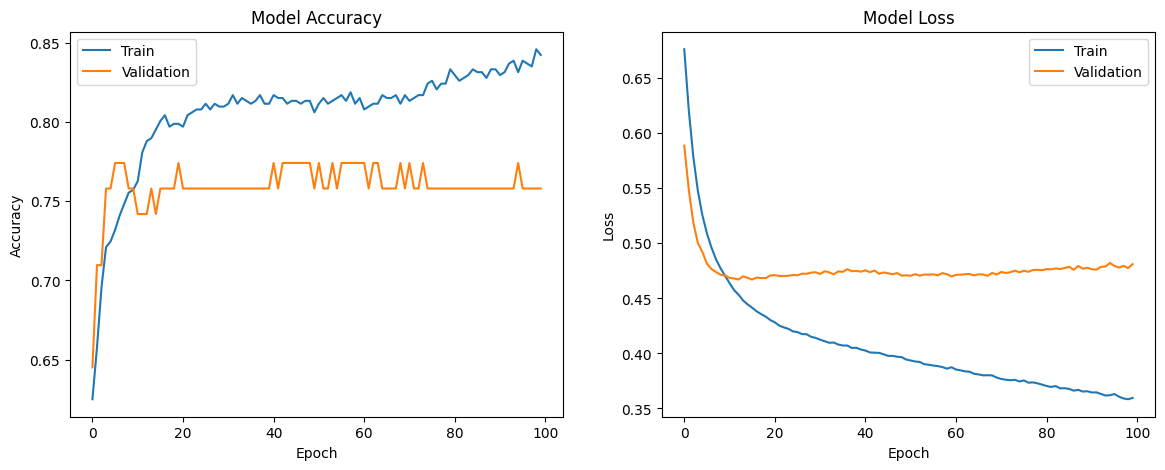

In [12]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch'); plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'])

plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch'); plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])

plt.show()


Step 10 — Evaluate on Test Data

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Accuracy: 0.7467532467532467

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154



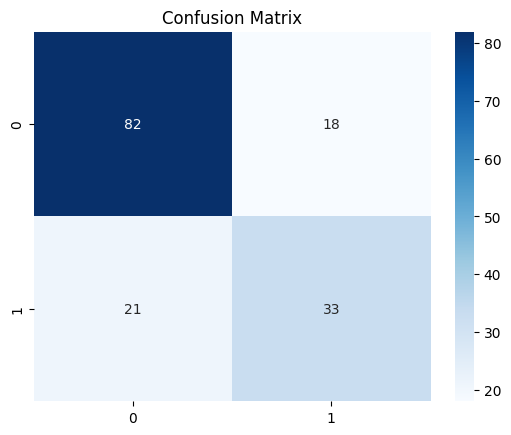

In [13]:
y_pred = (model.predict(X_test) > 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


Step 11 — Make a New Prediction

In [14]:
sample = np.array([[5, 120, 70, 20, 80, 28.5, 0.35, 35]])

sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

print("Diabetes Probability:", float(prediction))
print("Prediction (0=No, 1=Yes):", int(prediction > 0.5))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Diabetes Probability: 0.09828601032495499
Prediction (0=No, 1=Yes): 0


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/tmp/ipython-input-4077757316.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Diabetes Probability:", float(prediction))
/tmp/ipython-input-4077757316.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Prediction (0=No, 1=Yes):", int(prediction > 0.5))
